In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(4)

,area,bedrooms,price
9,3700,5,167.0
10,1800,3,82.0
11,2785,4,140.0
2,1440,3,62.0


**Preprocessing/Scaling**: To bring the data to the same scale

In [7]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler() #This function brings every to 0 to 1 scale
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [8]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [11]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [13]:
def batch_gradient_descent(x, y_true, epochs, learning_rate = 0.01):
    number_of_features = x.shape[1]
    
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = x.shape[0]

    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w, x.T) + b

        w_grad = -(2/total_samples)*(x.T.dot(y_true - y_predicted)) #x.T is Transpose of x
        b_grad = -(2/total_samples)*np.sum(y_true - y_predicted)

        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad

        cost = np.mean(np.square(y_true - y_predicted)) #MeanSquareError

        if i%10==0: #for every 10th iteration
            cost_list.append(cost)
            epoch_list.append(i)

    return w,b,cost,cost_list,epoch_list

w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

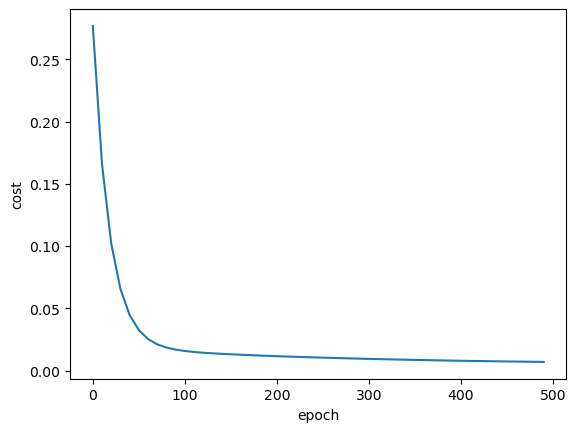

In [14]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

The above is a graph of the cost vs epoch, which shows gradient descent visually

In [17]:
def prediction(area,bedrooms,w,b):
    scaled_x = sx.transform([[area,bedrooms]])[0]
    scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

prediction(2600,4,w,b)

C:\Users\VidhuVikasSingh\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [19]:
prediction(1500,3,w,b)

C:\Users\VidhuVikasSingh\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.47860785714694

In [20]:
prediction(1000,2,w,b)

C:\Users\VidhuVikasSingh\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [25]:
import random
for i in range(8): 
    print(random.randint(0,6)) #generates a random integer in the specified range(including boundary integers)

5
5
6
0
0
5
4
3


In [31]:
def stochastic_gradient_descent(x,y_true,epochs,learning_rate=0.01):
    number_of_features = x.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = x.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y - y_predicted)) #x.T is Transpose of x
        b_grad = -(2/total_samples)*np.sum(sample_y - y_predicted)

        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad

        cost = np.square(sample_y - y_predicted) #MeanSquareError

        if i%100==0: #for every 100th iteration, record cost and epoch
            cost_list.append(cost)
            epoch_list.append(i)

    return w,b,cost,cost_list,epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70446418, 0.67192566]), -0.22677548593101246, 0.00027252830257865117)

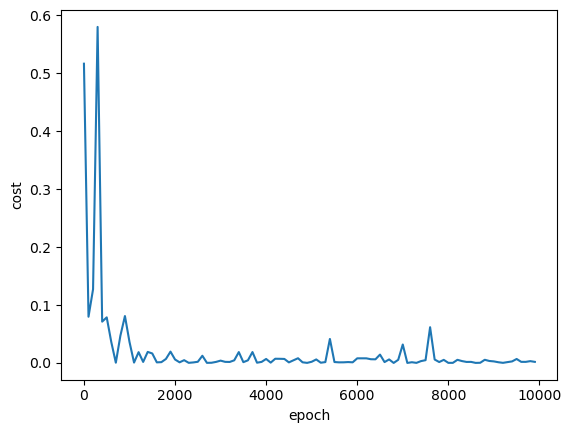

In [32]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [33]:
prediction(2600,4,w_sgd,b_sgd)

C:\Users\VidhuVikasSingh\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.44702224705347

<h1>The code after this is written solely by me</h1>

In [38]:
def mini_batch_gradient_descent(x,y_true,epochs,learning_rate=0.01):
    number_of_features = x.shape[1]
    w = np.ones(shape=(number_of_features)) #Assigning 1 to all weights initially
    b = 0
    total_samples = x.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        #random_lower_limit = random.randint(0,total_samples-1)
        #random_upper_limit = random.randint(random_lower_limit,total_samples-1)
        #The above lines randomize the size of the batch as well

        #The below code takes a batch of 10 only
        random_lower_limit = random.randint(0,total_samples-1-9)
        random_upper_limit = random_lower_limit+9
        
        x_new_sample = x[random_lower_limit, random_upper_limit]
        y_new_sample = y_true[random_lower_limit, random_upper_limit]

        y_predicted = np.dot(w, x_new_sample.T) + b
        
        w_grad = -(2/total_samples)*(x_new_sample.T.dot(y_new_sample - y_predicted)) #x.T is Transpose of x
        b_grad = -(2/total_samples)*np.sum(y_new_sample - y_predicted)

        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad

        cost = np.mean(np.square(y_new_sample - y_predicted)) #MeanSquareError

        if i%100==0: #for every 100th iteration
            cost_list.append(cost)
            epoch_list.append(i)

    return w,b,cost,cost_list,epoch_list

w_mbgd, b_mbgd, cost_mbgd, cost_list_mbgd, epoch_list_mbgd = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
w_mbgd, b_mbgd, cost_mbgd

(array([0.70501068, 0.6741005 ]), -0.22803849555421257, 0.00019665305584843848)

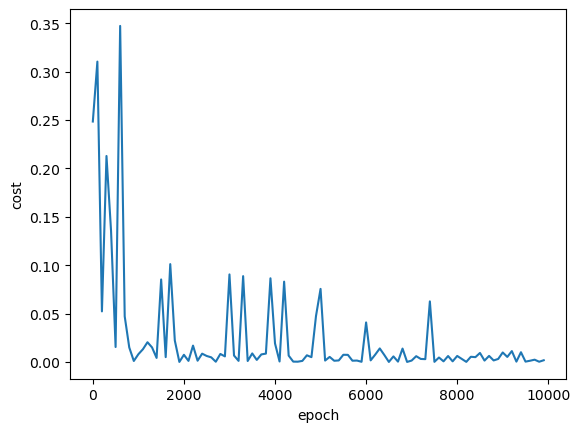

In [39]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_mbgd, cost_list_mbgd)

In [40]:
prediction(2600,4,w_mbgd,b_mbgd)

C:\Users\VidhuVikasSingh\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.54251177360365